### Contents
1. Load image examples
2. Downsize images -  tradeoff between computation costs and losing information (blury leaf outlines and edges)
3. Batch process (downsize) all images and "pickle" all downsized square images
4. Summary

### Load Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
from scipy import misc
from os import listdir
from six.moves import cPickle as pickle

### Load image files and plot image example
**Load all image filenames - the unique sample ID**

In [2]:
image_dir = '/Users/Zhongyu/Documents/projects/CNNplayground/leaf/images/'
all_image_filenames = listdir(image_dir)

**Load an image example and visualize it**

In [4]:
img_fn1 = all_image_filenames[0]
img1 = Image.open(image_dir+img_fn1)
print type(img1)
print img1.size

<class 'PIL.JpegImagePlugin.JpegImageFile'>
(526, 467)


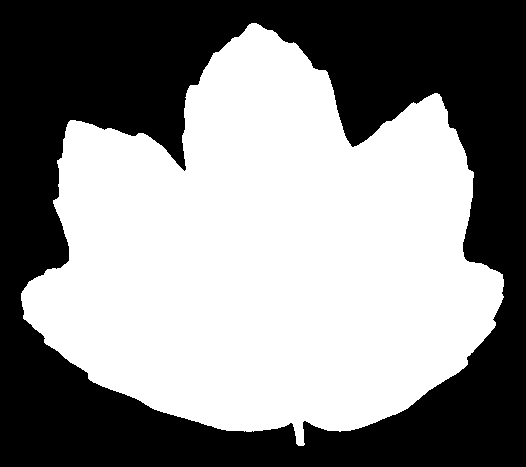

In [5]:
img1

### Downsize images 

In [6]:
def downsize_image(img, target_length=64):
    h, w = img.size[0], img.size[1]
    ratio = float(h)/w
    if h>w:
        new_size = (target_length, int(round(target_length/ratio)))
    else:
        new_size = (int(round(target_length*ratio)), target_length)
    img_downsized = img.resize(new_size, PIL.Image.ANTIALIAS)
    img_np = np.array(img_downsized)
    img_square = np.zeros([target_length, target_length],dtype=img_np.dtype)
    img_square[:img_np.shape[0], :img_np.shape[1]] = img_np
    return img_square

In [7]:
img_downsized = downsize_image(img1)

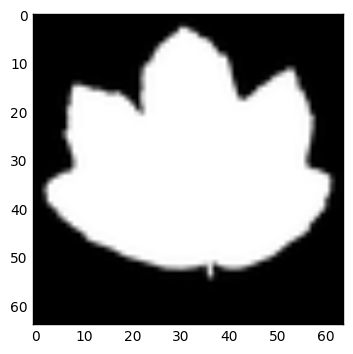

In [8]:
plt.imshow(img_downsized, cmap=plt.cm.gray)

**Tradeoff: downsized (square) image reduces computation costs, however, loses some clarity (sharpness) around the leaf outlines/edges**

### Batch process all images and pickle processed images

In [11]:
int(img_fn1.split('.')[0])

1

In [13]:
def batch_downsize(image_dir, target_length=64):
    img_dict = {}
    all_image_filenames = listdir(image_dir)
    for img_fn in all_image_filenames:
        img_id = int(img_fn.split('.')[0])
        with Image.open(image_dir+img_fn) as img:
            img_np = downsize_image(img, target_length=target_length)
            assert(img_np.shape==(target_length, target_length))
            img_dict[img_id] = img_np
    assert(len(img_dict)==1584)
    return img_dict

In [14]:
import time
t = time.time()
img_dict = batch_downsize(image_dir)
print time.time()-t

10.2467520237


**pickle downsized images**

In [16]:
def pickle_data(data, filename):
    with open(filename, "wb") as fh:
        pickle.dump(data, fh, protocol=2)

### Summary
1. Images are not square and relatively high resolution
2. Downsizing images to 64 by 64 (or other sizes) is a tradeoff between computation costs and information loss. A plain visual comparison of the original image and the downsized one indicates downsized images are more blurry and lose some sharpness on the edges and leaf outlines.
3. Batch downsizing all images costs about 9-10 seconds, loading pickled/saved downsized all images costs about 0.03 seconds